In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn


# **Load Necessary Libraries**

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

# **Unzip the dataset**

In [3]:
with zipfile.ZipFile('/content/Mall Customer Segmentation Data.zip', 'r') as zip_ref:
    zip_ref.extractall('customer_segmentation_data')

# **Load dataset**

In [4]:
df = pd.read_csv(os.path.join('customer_segmentation_data', 'Mall_Customers.csv'))

# **Display the first few rows of the dataset**

In [5]:
print("Data preview:")
print(df.head())

Data preview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


# **Select relevant features for clustering**

In [6]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# **Handle missing values (if any)**

In [10]:
X = df[features].dropna()

# **Standardize the features**

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Determine the optimal number of clusters using the Elbow Method**

In [12]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# **Plot the Elbow Method graph**

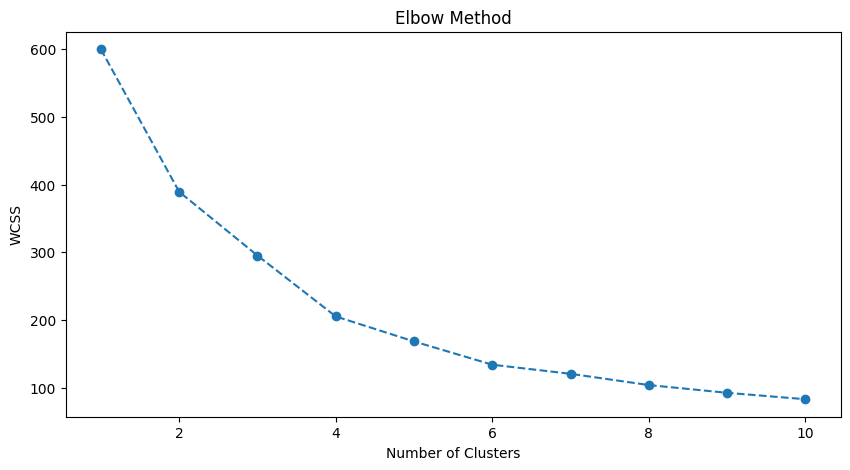

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# **Train the K-means model with the optimal number of clusters (let's assume it is 5 based on the elbow plot)**

In [14]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# **Add the cluster labels to the original dataframe**

In [15]:
df['Cluster'] = y_kmeans

# **Visualize the clusters**

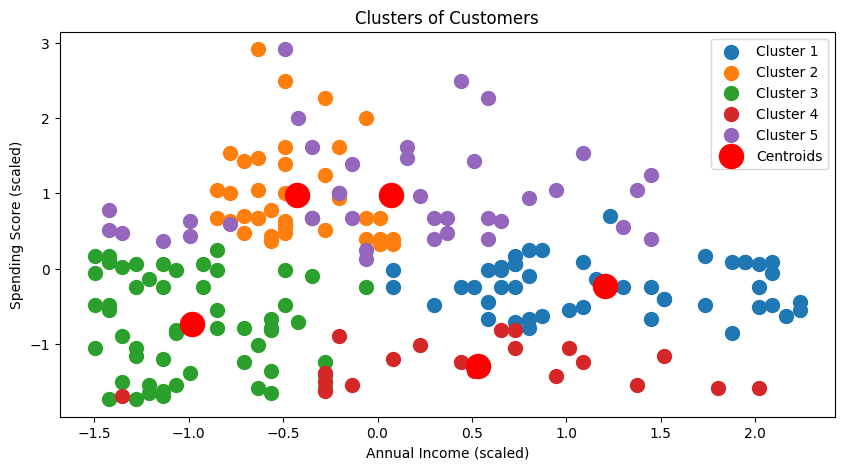

In [16]:
plt.figure(figsize=(10, 5))
for i in range(optimal_clusters):
    plt.scatter(X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1], s=100, label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

# **Save the clustered data to a CSV file**

In [17]:
df.to_csv('customer_segments.csv', index=False)

print("\nClustered data saved to 'customer_segments.csv'")


Clustered data saved to 'customer_segments.csv'
